In [1]:
#=
N=2
t=200


Y1=zeros(Float64,0,N)
Y2=zeros(Float64,0,N)
randx=zeros(Float64,1,N)
for j=1:t
    randx=2*rand(Float64,1,N).-1
    #if -16/9*sum(randx.^2)^2+randx[1]^2-randx[2]^2>0
    if maximum(abs.(randx))<0.5
        Y1=[Y1;randx]
    elseif maximum(abs.(randx))>0.75
        Y2=[Y2;randx]
    end
end

t1=size(Y1,1)
t2=size(Y2,1)

println("t1=",t1)
println("t2=",t2)
=#

t1=55
t2=95


In [2]:
#=
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
output_file = open(data*"/bivariate_data_SVM2.jl","w")

write(output_file, "N = $(N)")
write(output_file, "; \n \n")
write(output_file, "t1 = $(t1)")
write(output_file, "; \n \n")
write(output_file, "t2 = $(t2)")
write(output_file, "; \n \n")
write(output_file, "Y1 = ")
show(output_file, Y1)
write(output_file, "; \n \n")
write(output_file, "Y2 = ")
show(output_file, Y2)
write(output_file, "; \n \n")

close(output_file)
=#

In [1]:
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
include(data*"/bivariate_data_SVM2.jl");

In [2]:
include("../src/ClassificationModels2.jl")
using .ClassificationModels2

n=N

c=Inf

X=Vector{Matrix{Float64}}(undef,2)
X[1]=Y1
X[2]=Y2

t=[t1;t2]

k=20

eval_sep_pol=ClassificationModels2.model_SVM(n,X,t,c,k,lamb=0.001)

number of attributes: n=2
sample sizes for traint sets: t=[55, 95]
degree of separating polynomial: k=20
perturbed parameter: c=Inf
MOSEK warning 705: #156 (nearly) zero elements are specified in sparse row ''(233) of matrix 'A'.
MOSEK warning 705: #42 (nearly) zero elements are specified in sparse row ''(235) of matrix 'A'.
MOSEK warning 705: #141 (nearly) zero elements are specified in sparse row ''(237) of matrix 'A'.
MOSEK warning 705: #52 (nearly) zero elements are specified in sparse row ''(238) of matrix 'A'.
MOSEK warning 705: #144 (nearly) zero elements are specified in sparse row ''(239) of matrix 'A'.
MOSEK warning 705: #195 (nearly) zero elements are specified in sparse row ''(240) of matrix 'A'.
MOSEK warning 705: #10 (nearly) zero elements are specified in sparse row ''(241) of matrix 'A'.
MOSEK warning 705: #155 (nearly) zero elements are specified in sparse row ''(242) of matrix 'A'.
MOSEK warning 705: #81 (nearly) zero elements are specified in sparse row ''(243) of ma

(::Main.ClassificationModels2.var"#eval_sep_pol#285"{Int64, Vector{Float64}}) (generic function with 1 method)

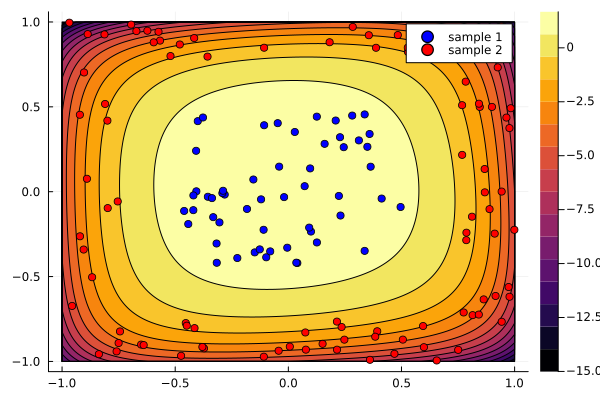

In [3]:
using Plots

import Contour: contours, levels, level, lines, coordinates

p_approx(x1,x2)=eval_sep_pol([x1;x2])

x1s = -1:0.01:1
x2s = -1:0.01:1

#contour(x1s, x2s, p_approx,fill=true,aspect_ratio = 1)
contour(x1s, x2s, p_approx,fill=true)

scatter!(Y1[:,1], Y1[:,2],label ="sample 1",color="Blue")
scatter!(Y2[:,1], Y2[:,2],label ="sample 2",color="Red")

In [9]:
#savefig("/home/hoanganh/Desktop/math-topics/SOSModels/drafts/bivariate_classification_estimation_svm1.png")

"/home/hoanganh/Desktop/math-topics/SOSModels/drafts/bivariate_classification_estimation_svm1.png"